# Filer og filbehandling

Referanse: [pyton.org - Input and Output - Reading and Writing Files](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)

Lese og skrive til filer er en nokså vanlig ting å gjøre i programmering.<br>
I Python bruker en **open()** funksjonen for å lage et filobjekt.<br>
**filobjekt = open(filnavn, modus)** Modus er en streng bestående av en eller flere bokstaver.
- 'r' read - åpner filen for lesing
- 'w' write - åpner filen for skriving
- 'a'append - åpner filen for å legge til data
- 'r+' read/write - åpner filen for lesing og skriving
- 'b' - åpner filen som en binærfil (Ikke tekst)

## Lese en tekstfil

Vi åpner filen tekstfil.txt i data katalogen. read() leser alt innholdet i filen. 

Teksfiler i Windows avslutter hver linje med bytene #0A#0D (10 13) (CR LF). I Linux/Mac så brukes bare #0D (13) (LF). Python3 forstår selv forskjellen på Windows og Linux filer. Vi splitter derfor fildataene våre i liner ved å bruke split('\n'). (I Python2 ville en måtte bruke \r\n for Windows filer.)

Når en er ferdig med å arbeide med en fil må en huske å "lukke" den med **close()**.

In [1]:
# Leser hele tekstfilen og splitter på linjeskift
fp = open('data/tekstfil.txt','r') # r Reading
text = fp.read()        # Leser hele filen
lines=text.split('\n')  # Splitter den på \n
fp.close()              # Lukker filen
for l in lines:         # Iterer linjene
    print(l)

And so he spoke, and so he spoke,
that Lord of Castamere,
But now the rains weep o'er his hall,
with no one there to hear.


Alternativt kan en bruke en "iterator" for å lese gjennom filen. Husk at hver linje da vil inneholde det usynlige linjeskift tegnet(ene).

In [2]:
#Leser tekstfilen linje for linje - iterator
f = open('data/tekstfil.txt','r')
for l in f: # filobjektet f, er en iterator 
  print(l,end='')  # \n er en del av linjen og vi instruerer print til å ikke skrive noe på slutten av linjen da linjeskift allerede er en del av linje.
f.close()

And so he spoke, and so he spoke,
that Lord of Castamere,
But now the rains weep o'er his hall,
with no one there to hear.

*Oppgave: Se hva som skjer om du forsøker å skrive inn noe i strengen til end='' eks. end="AAA " eller end='\n'. Hva skjer om en tar bort ,end='' parameteret* 

## Skrive en tekstfil

For å skrive til en tekstfil må den åpnes i w eller a modus. En bruker write() for å skrive til filen. En må selv sørge for å få med linjeskift for hver linje en skriver i filen. (\n)

In [3]:
f = open('data/tekstfil_skriv.txt','w') # Åpner filen i skrivemodus
f.write('Linje 1' + '\n') # Husk å få med linjeendelse
f.write('Linje 2' + '\n')
f.write('Linje 3' + '\n')
f.close()

*Oppgave: Se hva som skjer om du tar bort noen \n . Kjør neste program boks for å sjekke inneholdet eller se på den i notebook katalogen.*

Sjekker at vi fikk skrevet noe.

In [4]:
with open('data/tekstfil_skriv.txt','r') as f: print(f.read())

Linje 1
Linje 2
Linje 3



*Oppgave: Nå skal du bruke flere av tingene vi har vært gjennom til nå i Python kurset.*

*Lag et program som lar deg skrive inn en og en linje med tekst. Lagre hver linje som blir skrevet inn i filen: 'data/logg.txt'. Avlsutt programmet om teksten du har mottat er '.' (Ett punktum)*

*Hint: Bruk while, input() og filmodus: 'a'*

Sjekk at du fikk skrevet noe

In [ ]:
with open('data/logg.txt','r') as f: print(f.read())

## Skrving av binære filer
For at en fil ikke skal oppfattes som en tekstfil (Utf-8), så må vi ha med 'b' i mode på open().

In [ ]:
import random # Vi bruker funskjoner fra random modulen for å få tilfeldige tall

# Skriver en binær fil med 100 bytes og tilfeldige tall fra 0 til 255
# with - gir en kontekst for et objekt. Da slipper vi å bruke close(). Det vil også bli "ryddet opp" om noe går feil.
with open('data/bytes.bin', 'wb') as f:        
    f.write(bytes([random.randint(0,255) for i in range(100)])) 

## Lesing av binære filer

In [ ]:
# Leser en binærfil og skriver ut verdiene i hex
with open('data/bytes.bin', 'rb') as f: # Binær - b
    byte = f.read(1)                    # Leser 1 byte
    while byte:                         # Til byte er tom
        print(byte.hex(), end=' ')      # Hex verdi av byte
        byte = f.read(1)                # leser 1 byte

## Et praktisk eksempel

Referanser:<br>
[Python.org - Interpret bytes as packed binary data](https://docs.python.org/3.7/library/struct.html)<br>
[PNG - Portable Network Graphics - Specification](http://www.libpng.org/pub/png/spec/1.2/PNG-Structure.html)<br>
[Endianness](https://en.wikipedia.org/wiki/Endianness)<br>
[Stackoverflow - Understanding Python's slice notation](https://stackoverflow.com/questions/509211/understanding-pythons-slice-notation)

Her skal vi lese en binær fil - en .png bildefil. Datafiler har som regel en spesifikasjon for hvor en finner spesielle data i filen. 

Vi bruker *struct* biblioteket for å tolke flere påfølgende bytes til et tall bestående av mer enn en byte (Større en 255). '>i' indikerer at tallet vi skal lese er i formatet "little-endian" byte rekkefølge.

In [ ]:
import struct # Vi må bruke et bibliotek for å kovertere til tall større en 1 byte
with open('img/traffic-light.png', 'rb') as f:
    header = f.read(24) # Leser de første 24 bytene inn i header
    width  = struct.unpack('>i', header[16:20]) # Bredden er definert til å være ett 32 bit tall fra posisjon 16
    height = struct.unpack('>i', header[20:24]) # Høyden er definert til å være ett 32 bit tall fra posisjon 20
    # unpack returnerer en tuple av typen (verdi, None)

print('Bredden er:', width[0], 'Høyden er:', height[0])
    

*Oppgaver:*<br>
1. Forsøk å snu eller ta bort endian markøren i unpack funksjonen
2. Sjekk datatypen til header variablen. Hint: type()
3. I begynnelsen av png spesifikasjonen står det om 8 faste bytes som alltid er i en png fil.
Les disse og lag begynnelsen av en funksjon som kan sjekke filformat på filtyper ved å se på headeren i filen.

In [ ]:
PNG_ID =  bytes((137, 80, 78, 71, 13, 10, 26, 10))


Ekstra: For å arbeide med bilder i Python kan en bruke [PIL / Pillow](https://pillow.readthedocs.io/en/3.0.x/index.html) biblioteket.

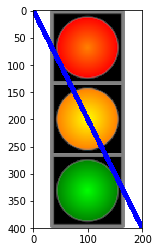

In [4]:
from PIL import Image, ImageDraw
img = Image.open('img/traffic-light.png', 'r')
# tegner en blå strek over bildet
draw = ImageDraw.Draw(img)
draw.line((0, 0) + img.size, fill='blue', width=10)
del(draw) # Sletter draw objektet

# Magi for å vise bildet i Jupyter Notebook (Ikke noe en normalt vil måtte gjøre med et bilde)
from matplotlib.pyplot import imshow
import numpy as np
%matplotlib inline
imshow(np.asarray(img))